In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc

In [2]:
zoo = pd.read_csv("zoo.csv")
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
cl = pd.read_csv("class.csv")
cl

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


#### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


#### zoo.csv
Этот набор данных состоит из 101 животного из зоопарка. Существует 16 переменных с различными признаками для описания животных. 7 Типов классов: Млекопитающие, Птицы, Рептилии, Рыбы, Амфибии, Клопы и Беспозвоночные.
Набор включает в себя следующие показатели:
- animal_name: Уникальный для каждого экземпляра
- волосы
- перья 
- яйца 
- молоко 
- воздушные 
- водные 
- хищники 
- зубчатые
- позвоночник 
- дышит 
- ядовитый 
- плавники
- число ног (набор значений: {0,2,4,5,6,8})
- хвост
- домашний
- класс

#### class.csv
Этот файл описывает набор данных и включает в себя следующие показатели:
- Номер класса (целочисленные значения в диапазоне [1,7]
- Количество Видов Животных В Классе
- Символ типа класса - фактическое словесное описание класса
- Колличество наименований в классе - Список животных, попадающих в категорию данного класса

#### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
print("До drop_duplicates:", zoo.shape)
zoo.drop_duplicates()
print("После  drop_duplicates:", zoo.shape)

До drop_duplicates: (101, 18)
После  drop_duplicates: (101, 18)


#### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [6]:
zoo['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

<AxesSubplot:>

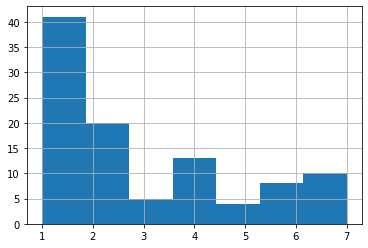

In [26]:
binsNumber = 7
zoo['class_type'].hist(bins=binsNumber)

Соотношение классов не сбалансировано

#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
cat_columns = [c for c in zoo.columns if zoo[c].dtype.name == 'object']
num_columns   = [c for c in zoo.columns if zoo[c].dtype.name != 'object']
print (f"Категориальные: {cat_columns}")
print (f"Числовые: {num_columns}")

Категориальные: ['animal_name']
Числовые: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


<AxesSubplot:>

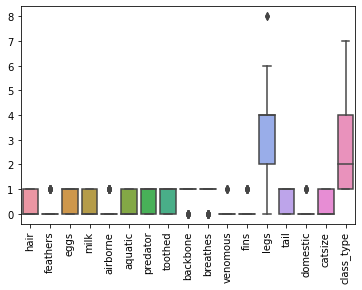

In [10]:
plt.xticks(rotation='vertical')
sns.boxplot( data=zoo)

In [11]:
#нормализуем
zoo_num = zoo[['hair', 'feathers', 'eggs', 'milk', 'airborne',
        'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']]  #  Количественные признаки
zoo_num = (zoo_num - zoo_num.mean()) / zoo_num.std()  #  К нулевому среднему и единичному среднеквадратичному отклонению
zoo_num.describe()  #  Инфо

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
mean,1.670831e-16,-2.198461e-17,9.893076e-17,-1.253123e-16,1.099231e-16,4.616769e-17,-8.354153e-17,5.716000e-17,4.836615e-17,-2.638154e-17,1.791746e-16,-5.716000e-17,7.145000e-17,1.363046e-16,1.802738e-16,-1.538923e-17,6.595384e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.567607e-01,-4.944380e-01,-1.179344e+00,-8.225373e-01,-5.555198e-01,-7.405150e-01,-1.110010e+00,-1.228780e+00,-2.136693e+00,-1.942114e+00,-2.918387e-01,-4.476351e-01,-1.397465e+00,-1.689987e+00,-3.824456e-01,-8.742351e-01,-8.711063e-01
25%,-8.567607e-01,-4.944380e-01,-1.179344e+00,-8.225373e-01,-5.555198e-01,-7.405150e-01,-1.110010e+00,-1.228780e+00,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,-4.138834e-01,-1.689987e+00,-3.824456e-01,-8.742351e-01,-8.711063e-01
50%,-8.567607e-01,-4.944380e-01,8.395333e-01,-8.225373e-01,-5.555198e-01,-7.405150e-01,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,5.696983e-01,5.858620e-01,-3.824456e-01,-8.742351e-01,-3.955293e-01
75%,1.155631e+00,-4.944380e-01,8.395333e-01,1.203713e+00,-5.555198e-01,1.337041e+00,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,-2.918387e-01,-4.476351e-01,5.696983e-01,5.858620e-01,-3.824456e-01,1.132532e+00,5.556245e-01
max,1.155631e+00,2.002474e+00,8.395333e-01,1.203713e+00,1.782293e+00,1.337041e+00,8.919727e-01,8.057576e-01,4.633792e-01,5.098049e-01,3.392624e+00,2.211844e+00,2.536862e+00,5.858620e-01,2.588862e+00,1.132532e+00,1.982355e+00


In [12]:
zoo_num

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532,-0.871106
1,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,-1.110010,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532,-0.871106
2,-0.856761,-0.494438,0.839533,-0.822537,-0.555520,1.337041,0.891973,0.805758,0.463379,-1.942114,-0.291839,2.211844,-1.397465,0.585862,-0.382446,-0.874235,0.555625
3,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,-1.689987,-0.382446,1.132532,-0.871106
4,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532,-0.871106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,-1.110010,0.805758,0.463379,0.509805,-0.291839,-0.447635,-0.413883,0.585862,-0.382446,1.132532,-0.871106
97,1.155631,-0.494438,0.839533,-0.822537,1.782293,-0.740515,-1.110010,-1.228780,-2.136693,0.509805,3.392624,-0.447635,1.553280,-1.689987,-0.382446,-0.874235,1.506778
98,1.155631,-0.494438,-1.179344,1.203713,-0.555520,-0.740515,0.891973,0.805758,0.463379,0.509805,-0.291839,-0.447635,0.569698,0.585862,-0.382446,1.132532,-0.871106
99,-0.856761,-0.494438,0.839533,-0.822537,-0.555520,-0.740515,-1.110010,-1.228780,-2.136693,0.509805,-0.291839,-0.447635,-1.397465,-1.689987,-0.382446,-0.874235,1.982355


<AxesSubplot:>

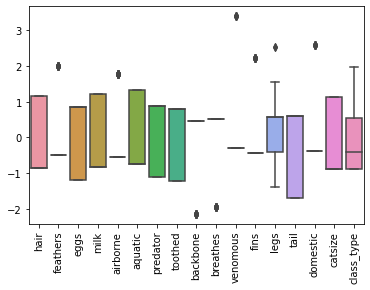

In [13]:
plt.xticks(rotation='vertical')
sns.boxplot( data=zoo_num)

#### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [15]:
for column in zoo:
    zoo['animal_name'] = pd.Series(label_encoder.fit_transform(zoo['animal_name']))
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,1.000000,-0.109112,0.058483,0.113466,-0.138181,0.048277,0.023475,-0.027931,-0.130423,-0.058669,0.080751,0.169083,-0.037985,-0.087070,0.092462,-0.206519,-0.027243,0.080012
hair,-0.109112,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,0.058483,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,0.113466,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,-0.138181,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,0.048277,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,0.023475,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.027931,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,-0.130423,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,-0.058669,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845


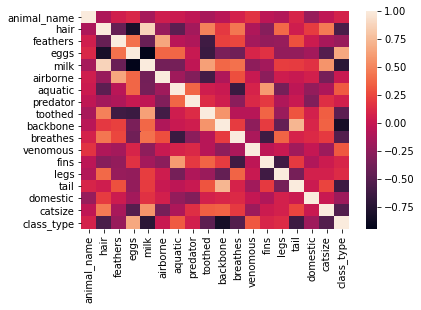

In [16]:
sns.heatmap(zoo.corr())
zoo.corr()

#### 7.	Заполните пропущенные значения в данных

In [17]:
zoo[zoo.isna().any(axis=1)]
# пропусков нет

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type


#### Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку

1. Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [18]:
# Входные признаки - X, выделенный признак - y
X = zoo.drop(('animal_name'), axis=1)
Y = zoo.class_type
feature_names = X.columns
print (feature_names)
print(f"Количество входных признаков: {X.shape[1]}")

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'class_type'],
      dtype='object')
Количество входных признаков: 17


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)  #  Разбиваем данные на обучающую/тестовую выборки 70%/30%
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

70 31


In [20]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)
radnc = RadiusNeighborsClassifier()

In [21]:
radnc.get_params()
params = {'radius': np.linspace(3, 5, 50),
          'weights': ['uniform', 'distance']}
radnc_grid = GridSearchCV(radnc, params)
radnc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': array([3.        , 3.04081633, 3.08163265, 3.12244898, 3.16326531,
       3.20408163, 3.24489796, 3.28571429, 3.32653061, 3.36734694,
       3.40816327, 3.44897959, 3.48979592, 3.53061224, 3.57142857,
       3.6122449 , 3.65306122, 3.69387755, 3.73469388, 3.7755102 ,
       3.81632653, 3.85714286, 3.89795918, 3.93877551, 3.97959184,
       4.02040816, 4.06122449, 4.10204082, 4.14285714, 4.18367347,
       4.2244898 , 4.26530612, 4.30612245, 4.34693878, 4.3877551 ,
       4.42857143, 4.46938776, 4.51020408, 4.55102041, 4.59183673,
       4.63265306, 4.67346939, 4.71428571, 4.75510204, 4.79591837,
       4.83673469, 4.87755102, 4.91836735, 4.95918367, 5.        ]),
                         'weights': ['uniform', 'distance']})

In [22]:
rad = radnc_grid.best_estimator_.radius_neighbors
radnc = RadiusNeighborsClassifier(3)
radnc.fit(X_train, y_train)
y_score = radnc.predict(X_test)

print('Точность классификатора: %.7f'%(accuracy_score(y_test, y_score)))
print('Лучшее значение: %.7f'%(radnc_grid.best_score_))

Точность классификатора: 0.9354839
Лучшее значение: 0.9428571


2. Линейный классификатор (персептрон)

In [23]:
ppn = Perceptron()
ppn_params = {'alpha': np.linspace(0, 1, 20),
              'max_iter': [X for X in range(1, 50)]}
print(ppn_params)

{'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]), 'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [24]:
ppn_grid = GridSearchCV(estimator=ppn, param_grid=ppn_params) 
ppn_grid.fit(X_train, y_train)
alpha = ppn_grid.best_estimator_.alpha
max_iter = ppn_grid.best_estimator_.max_iter
ppn = Perceptron(alpha = alpha, max_iter = max_iter)
ppn.fit(X_train, y_train)
y_score = ppn.predict(X_test)

print('Точность классификатора: %.7f'%(accuracy_score(y_test, y_score)))
print('Лучшее значение: %.7f'%(ppn_grid.best_score_))

Точность классификатора: 0.8709677
Лучшее значение: 0.9285714
